In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
df = pd.read_csv("C:\\Users\\HPlap\\Downloads\\IRIS (1).csv")


In [47]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
df['species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [52]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [60]:
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

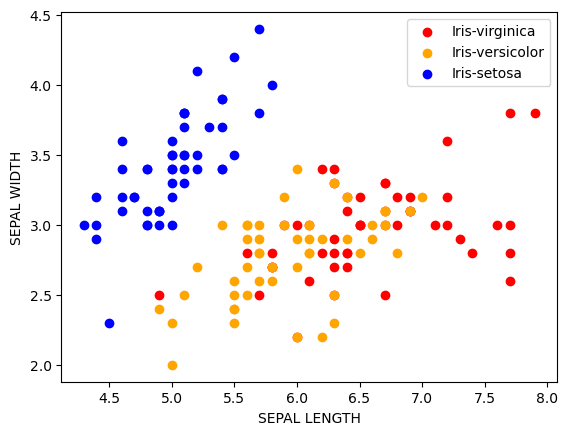

In [64]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("SEPAL LENGTH")
plt.ylabel("SEPAL WIDTH")
plt.legend()

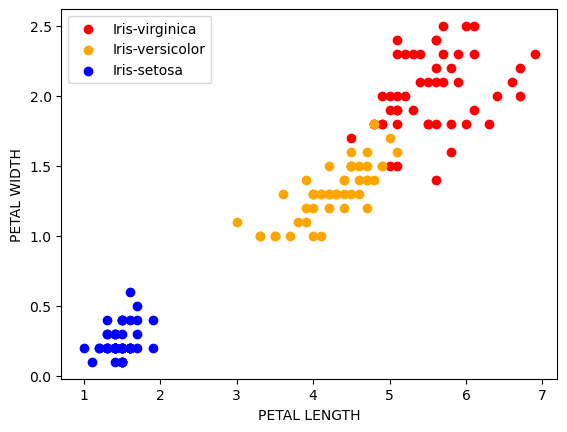

In [65]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("PETAL LENGTH")
plt.ylabel("PETAL WIDTH")
plt.legend()

In [66]:
df.corr()

C:\Users\HPlap\AppData\Local\Temp\ipykernel_20968\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\HPlap\AppData\Local\Temp\ipykernel_20968\3369442549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

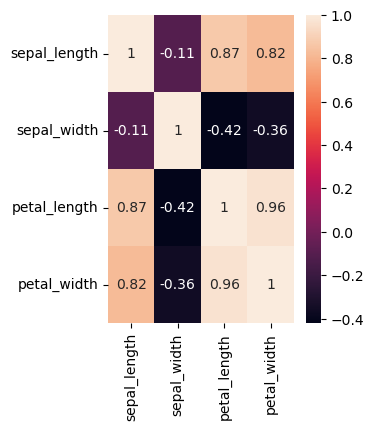

In [68]:
corr=df.corr()
fig,ax = plt.subplots(figsize=(3,4))
sns.heatmap(corr,annot=True,ax=ax)

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [71]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [72]:
from sklearn.model_selection import train_test_split
# train = 70
# test = 30
x=df.drop(columns=['species'])
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [73]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [74]:
model.fit(x_train,y_train)

C:\Users\HPlap\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
print("ACCURACY",model.score(x_test,y_test)*100)

ACCURACY 100.0


In [76]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [77]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
print("ACCURACY",model.score(x_test,y_test)*100)

ACCURACY 93.33333333333333


In [79]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [80]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
print("ACCURACY",model.score(x_test,y_test)*100)

ACCURACY 95.55555555555556
